<a href="https://colab.research.google.com/github/XVI-IX/Hamoye-Time-Series/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf, acf
from prophet import Prophet

In [ ]:
df = pd.read_csv("forecast.csv", parse_dates=[0])
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.index = df["fulldate"]

In [ ]:
df.head()

,fulldate,tmax,sysload,gasprice,elecprice
fulldate,,,,,
2010-09-01 00:00:00,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


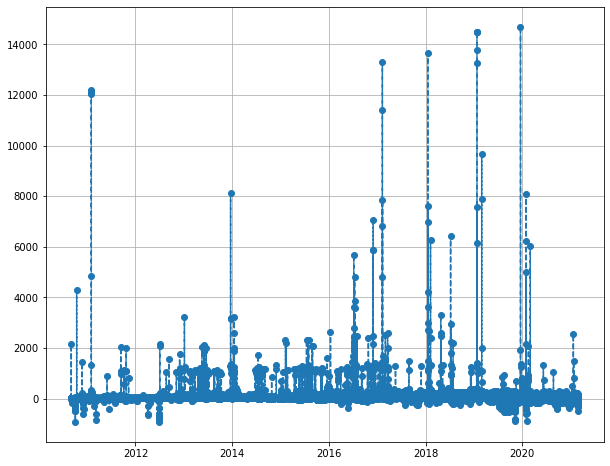

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(df.index, df.elecprice, '--', marker="o")
plt.grid()

In [ ]:
df.isnull().sum()

fulldate     0
tmax         0
sysload      0
gasprice     0
elecprice    0
dtype: int64

In [ ]:
df_daily_sum = df.resample("D").sum()

In [ ]:
df_daily_sum.reset_index(inplace=True)

In [ ]:
df_daily_sum.index = df_daily_sum.fulldate
df_daily_sum

,fulldate,tmax,sysload,gasprice,elecprice
fulldate,,,,,
2010-09-01,2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
2021-02-24,2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,2021-02-26,547.2,9517.02430,130.1808,1445.495


Text(0.5, 1.0, 'Total Electricity Costs per Quarter')

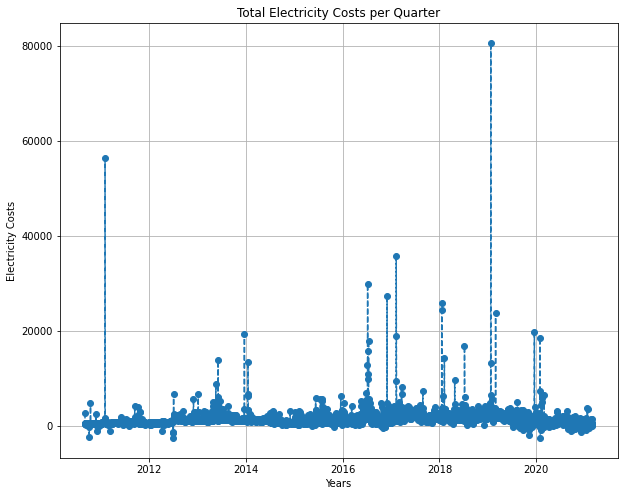

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(df_daily_sum.index, df_daily_sum.elecprice, '--', marker="o")
plt.grid()

plt.xlabel("Years")
plt.ylabel("Electricity Costs")
plt.title("Total Electricity Costs per Quarter")

In [ ]:
decompose_series = seasonal_decompose(
  df_daily_sum["elecprice"], model="additive"
)

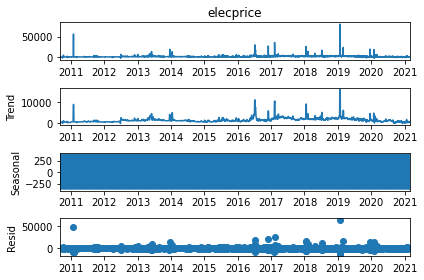

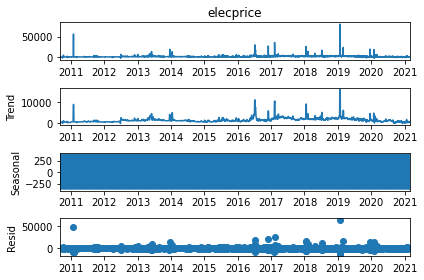

In [ ]:
decompose_series.plot()

In [ ]:
adf_result = adfuller(df_daily_sum["elecprice"])

print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"No. of lags used: {adf_result[2]}")
print(f"No. of observations used: {adf_result[3]}")
print("Critical Values")
for k, v in adf_result[4].items():
  print(f"  {k}:{v}")

ADF Statistic: -8.269053866873803
p-value: 0.0
No. of lags used: 20
No. of observations used: 3813
Critical Values
  1%:-3.432066157296446
  5%:-2.8622983040036005
  10%:-2.5671736550459663


In [ ]:
adf_result = adfuller(df_daily_sum["sysload"])

print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"No. of lags used: {adf_result[2]}")
print(f"No. of observations used: {adf_result[3]}")
print("Critical Values")
for k, v in adf_result[4].items():
  print(f"  {k}:{v}")

ADF Statistic: -3.6901589888366457
p-value: 0.004253725504574117
No. of lags used: 30
No. of observations used: 3803
Critical Values
  1%:-3.432070672988693
  5%:-2.8623002987378547
  10%:-2.567174716967499


In [ ]:
adf_result = adfuller(df_daily_sum["gasprice"])

print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"No. of lags used: {adf_result[2]}")
print(f"No. of observations used: {adf_result[3]}")
print("Critical Values")
for k, v in adf_result[4].items():
  print(f"  {k}:{v}")

ADF Statistic: -2.90276669716518
p-value: 0.04502721288462542
No. of lags used: 27
No. of observations used: 3806
Critical Values
  1%:-3.4320693157877544
  5%:-2.8622996992165364
  10%:-2.5671743978048323


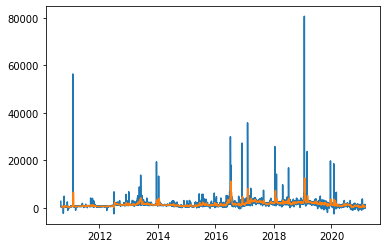

In [ ]:
plt.plot(
  df_daily_sum.index, df_daily_sum.elecprice,
)
plt.plot(
  df_daily_sum.elecprice.rolling(10).mean()
)

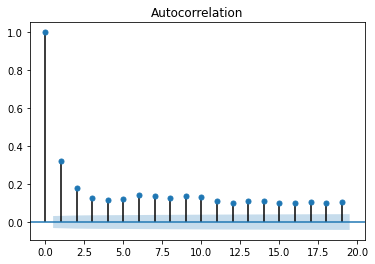

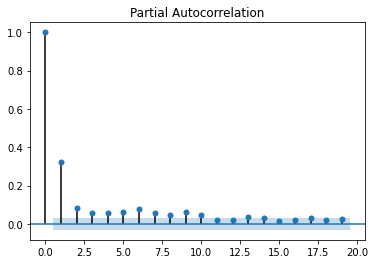

In [ ]:
plot_acf(df_daily_sum.elecprice, lags=range(0, 20))
plot_pacf(df_daily_sum.elecprice, lags=range(0, 20))
plt.show()

In [ ]:
df_prophet = df_daily_sum.rename(columns={
  'fulldate':'ds',
  'elecprice': 'y'
})

In [ ]:
df_prophet[['tmax', 'sysload', 'gasprice', 'y']] = np.log(df_prophet[['tmax', 'sysload', 'gasprice', 'y']])
df_prophet.dropna(inplace=True)

In [ ]:
df_prophet_1 = df_prophet[['ds', 'y']]

In [ ]:
train = df_prophet_1.iloc[:2757]
test = df_prophet_1.iloc[2757:]

In [ ]:
test

,ds,y
fulldate,,
2018-05-12,2018-05-12,1.999342
2018-05-13,2018-05-13,2.014054
2018-05-14,2018-05-14,2.084909
2018-05-15,2018-05-15,2.062750
2018-05-16,2018-05-16,2.082262
...,...,...
2021-02-20,2021-02-20,1.926511
2021-02-21,2021-02-21,1.742763
2021-02-25,2021-02-25,1.849829


In [ ]:
model = Prophet()
model.fit(df_prophet_1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl6xio26x/77j7bz1b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl6xio26x/hlq5gt3v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48567', 'data', 'file=/tmp/tmpl6xio26x/77j7bz1b.json', 'init=/tmp/tmpl6xio26x/hlq5gt3v.json', 'output', 'file=/tmp/tmppdsfs658/prophet_model-20220930141508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:15:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model.predict(test[['ds']])
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-12,2.060511,1.965512,2.128470,2.060511,2.060511,-0.015310,-0.015310,-0.015310,-0.013391,-0.013391,-0.013391,-0.001920,-0.001920,-0.001920,0.0,0.0,0.0,2.045201
1,2018-05-13,2.060568,1.954426,2.120548,2.060568,2.060568,-0.023655,-0.023655,-0.023655,-0.023209,-0.023209,-0.023209,-0.000446,-0.000446,-0.000446,0.0,0.0,0.0,2.036913
2,2018-05-14,2.060625,1.985028,2.153770,2.060625,2.060625,0.006693,0.006693,0.006693,0.005565,0.005565,0.005565,0.001128,0.001128,0.001128,0.0,0.0,0.0,2.067317
3,2018-05-15,2.060681,1.984953,2.150213,2.060681,2.060681,0.009833,0.009833,0.009833,0.007043,0.007043,0.007043,0.002790,0.002790,0.002790,0.0,0.0,0.0,2.070514
4,2018-05-16,2.060738,1.997165,2.159176,2.060738,2.060738,0.013309,0.013309,0.013309,0.008784,0.008784,0.008784,0.004524,0.004524,0.004524,0.0,0.0,0.0,2.074047


In [ ]:
forecast['yhat']

0      2.045201
1      2.036913
2      2.067317
3      2.070514
4      2.074047
         ...   
768    1.902280
769    1.892365
770    1.923229
771    1.920521
772    1.900046
Name: yhat, Length: 773, dtype: float64

In [ ]:
train = df_prophet.iloc[:2757]
test = df_prophet.iloc[2757:]

In [ ]:
df_prophet

,ds,tmax,sysload,gasprice,y
fulldate,,,,,
2010-09-01,2010-09-01,1.781383,2.364153,1.500444,2.069388
2010-09-02,2010-09-02,1.777055,2.357899,1.500444,1.847991
2010-09-03,2010-09-03,1.805819,2.364379,1.541364,1.828495
2010-09-04,2010-09-04,1.757073,2.349580,1.481351,1.827633
2010-09-05,2010-09-05,1.771457,2.349509,1.541364,1.827081
...,...,...,...,...,...
2021-02-20,2021-02-20,1.872829,2.140511,1.593918,1.926511
2021-02-21,2021-02-21,1.838502,2.144657,1.585902,1.742763
2021-02-25,2021-02-25,1.832701,2.130667,1.583383,1.849829


In [ ]:
model_regressors = Prophet()
model_regressors.add_regressor('sysload')
# model_regressors.add_regressor('tmax')
model_regressors.add_regressor('gasprice')
model_regressors.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl6xio26x/tjz6wfbb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl6xio26x/_uqh_tyb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86540', 'data', 'file=/tmp/tmpl6xio26x/tjz6wfbb.json', 'init=/tmp/tmpl6xio26x/_uqh_tyb.json', 'output', 'file=/tmp/tmpwxv574m9/prophet_model-20220930141513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:15:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast_regressor = model_regressors.predict(test[['ds', 'sysload', 'tmax', 'gasprice']])
forecast_regressor.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-05-12,2.045691,1.976627,2.110929,2.045691,2.045691,-0.002973,-0.002973,-0.002973,-0.000461,...,-0.008035,-0.008035,-0.008035,0.005524,0.005524,0.005524,0.0,0.0,0.0,2.042718
1,2018-05-13,2.045805,1.995055,2.135372,2.045805,2.045805,0.019177,0.019177,0.019177,0.024787,...,-0.011659,-0.011659,-0.011659,0.006049,0.006049,0.006049,0.0,0.0,0.0,2.064983
2,2018-05-14,2.045920,2.043591,2.181197,2.045920,2.045920,0.063137,0.063137,0.063137,0.051249,...,0.005169,0.005169,0.005169,0.006718,0.006718,0.006718,0.0,0.0,0.0,2.109057
3,2018-05-15,2.046035,2.025288,2.166802,2.046035,2.046035,0.048328,0.048328,0.048328,0.037341,...,0.003457,0.003457,0.003457,0.007529,0.007529,0.007529,0.0,0.0,0.0,2.094362
4,2018-05-16,2.046149,2.016641,2.159786,2.046149,2.046149,0.042752,0.042752,0.042752,0.028756,...,0.005520,0.005520,0.005520,0.008476,0.008476,0.008476,0.0,0.0,0.0,2.088901


In [ ]:
forecast_regressor[['yhat']]

,yhat
0,2.042718
1,2.064983
2,2.109057
3,2.094362
4,2.088901
...,...
768,2.088858
769,2.083439
770,2.088591
771,2.123742


In [ ]:
def MAPE(y_true, yhat):
  y_sum = 0
  for i in range(len(y_true)):
    y_sum += ((y_true[i] - yhat[i]) / y_true[i])
  
  return y_sum / len(y_true)

In [ ]:
test['y'][1]

2.0140543076240154

In [ ]:
MAPE(test['y'], forecast['yhat'])

-0.0003235853931568118

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
rmse = np.sqrt(mse(test['y'], forecast['yhat']))

In [ ]:
rmse

0.06614987820238277

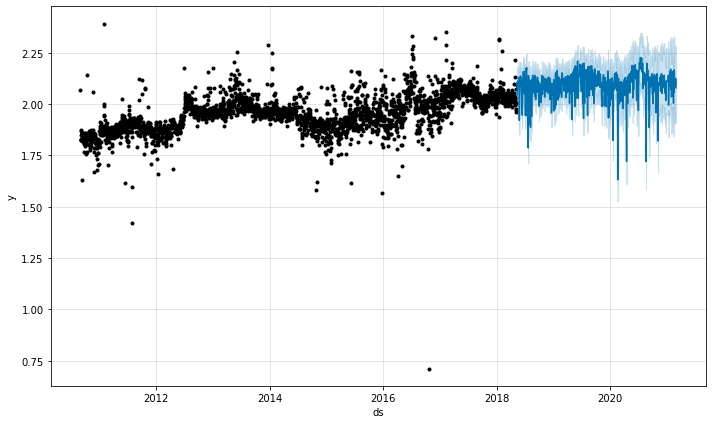

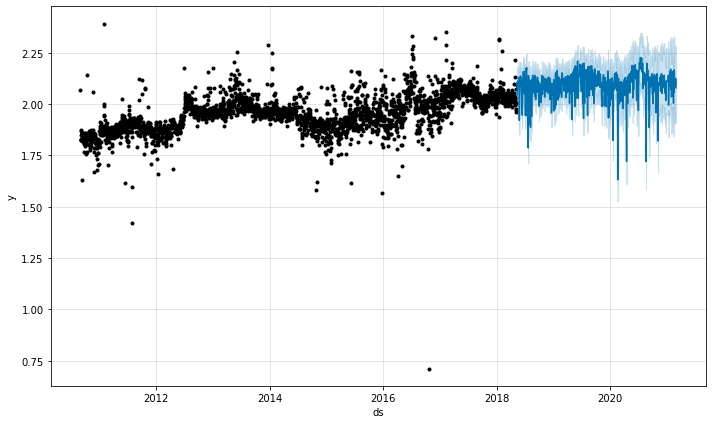

In [ ]:
model_regressors.plot(forecast_regressor)

In [ ]:
MAPE(test['y'], forecast_regressor['yhat'])

-0.049082601255667255

In [ ]:
rmse = np.sqrt(mse(test['y'], forecast_regressor['yhat']))

In [ ]:
rmse

0.12714920186571188